In [1]:
import requests
import platform

# 플랫폼에 따라 포트 다르게 저장
PORT = "9150" if platform.system() == "Windows" else "9050"

# 토르 브라우저의 프록시를 이용하기 위해 프록시 저장
PROXIES = {
    "http": f"socks5h://127.0.0.1:{PORT}",
    "https": f"socks5h://127.0.0.1:{PORT}"
}

# 예시 사이트 크롤링. Coinbase Cartel
URL = "http://fjg4zi4opkxkvdz7mvwp7h6goe4tcby3hhkrz43pht4j3vakhy75znyd.onion"
res = requests.get(URL, proxies=PROXIES)

print(res.text)

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>System Breach • Coinbase Cartel</title>
  <meta name="viewport" content="width=device-width,initial-scale=1">
  <meta http-equiv="X-Content-Type-Options" content="nosniff">
  <meta name="robots" content="noindex">
  <meta http-equiv="Cache-Control" content="no-store, no-cache, must-revalidate">
  <link rel="stylesheet" href="/media/css/site.css?v=1756120101">
  <link rel="stylesheet" href="/media/css/popup.css?v=ann4">
</head>
<body>


<input type="checkbox" id="ann-modal-toggle" checked>
<label for="ann-modal-toggle" class="ann-modal-backdrop" aria-hidden="true"></label>
<div class="ann-modal-box" role="dialog" aria-modal="true" aria-labelledby="ann-modal-title">
  <div class="ann-modal-header">
    <h2 id="ann-modal-title">⚠️ CRITICAL ANNOUNCEMENTS</h2>
    <label for="ann-modal-toggle" class="ann-modal-close" aria-label="Close">&times;</label>
  </div>
  <div class="ann-modal-content">
    
    <div class="ann

In [2]:
from typing import Optional

def get_tor_response(url: str, timeout: int = 30) -> Optional[requests.Response]:
    """
    주어진 URL에 대해 토르 네트워크를 통해 HTTP GET 요청.

    :param url: 요청을 보낼 URL 주소
    :param timeout: 요청 대기 시간 (초)
    :return: 성공 시 requests.Response 객체, 실패 시 None
    """
    print(f"Tor 프록시(포트: {PORT})를 통해 {url}에 접속을 시도")

    try:
        res = requests.get(url, proxies=PROXIES, timeout=timeout)
        res.raise_for_status()
        print("--- 접속 성공 ---")
        return res
    except Exception as e:
        print(f"Error: {e}")
        return None

In [3]:
res = get_tor_response(URL)

Tor 프록시(포트: 9150)를 통해 http://fjg4zi4opkxkvdz7mvwp7h6goe4tcby3hhkrz43pht4j3vakhy75znyd.onion에 접속을 시도
--- 접속 성공 ---


In [67]:
from bs4 import BeautifulSoup, Tag
from typing import Optional

# BeautifulSoup 라이브러리를 이용해 파싱
soup = BeautifulSoup(res.text, 'html.parser')


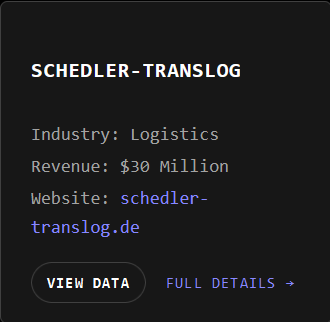

먼저 위 아티클 하나를 크롤링하는 코드 개발

In [68]:
# companies-grid 클래스에 있는 article들을 리스트로 반환
article_list = soup.select("div.companies-grid > article")

# TODO: 주석 해제하고 실행해서 어떤 데이터 넘어오는지 확인해보세요
# print(article_list[0])

# 첫 번째 아티클 선택, 이름 추출 확인
article = article_list[0]
first_article_name = article.select_one("h3.card-name").get_text(strip=True)
print(first_article_name)

Schedler-translog


In [ ]:
# 데이터 추출에 필요한 태그들을 추출
name_tag = article.select_one("h3.card-name")
meta_tag = article.select_one("div.card-meta")
website_tag = meta_tag.select_one("a")
details_link_tag = article.select_one('a.view-detail')

In [70]:
name = name_tag.get_text(strip=True) if name_tag else "No Name"
print(name)

Schedler-translog


In [71]:
industry = "No Industry"
revenue = "No Revenue"

for span in meta_tag:
    span_text = span.get_text()
    if "Industry" in span_text:
        industry = span_text.replace("Industry:", "").strip()
        print(industry)
    elif "Revenue" in span_text:
        revenue = span_text.replace("Revenue:", "").strip()
        print(revenue)

Logistics
$30 Million


In [72]:
website = website_tag.get("href")
print(website)

schedler-translog.de


In [73]:
# details_link = details_link_tag['href'] if details_link_tag else None
# details_link = details_link_tag.get("href")
details_link = details_link_tag["href"] if details_link_tag and "href" in details_link_tag.attrs else None
print(details_link)

/companies/schedler


In [ ]:
class CC_Victim: 
    def __init__(self, name:str, industry:str=None, revenue:str=None, website:str=None, details_link:str=None):
        """
        Coinbase_Cartel_Victim 데이터 타입 클래스
        
        :param name: 회사 이름 (필수)
        :param industry: 산업 분야
        :param revenue: 매출
        :param website: 웹사이트 주소
        :param details_link: 상세 정보 링크, 링크가 없을 시엔 None
        """
        self.name = name
        self.industry = industry
        self.revenue = revenue
        self.website = website
        self.details_link = details_link

    def to_str(self):
        return f"[Name: {self.name}, industry: {self.industry}, revenue: {self.revenue}, website: {self.website}, details_link: {self.details_link}]"

    def __str__(self):
        return self.to_str()
    
    def __repr__(self):
        return self.to_str()


    def to_dict(self):
        return {
            'name': self.name,
            'industry': self.industry,
            'revenue': self.revenue,
            'website': self.website,
            'details_link': self.details_link
        }

In [ ]:
def get_company_info(article_tag: Tag) -> Optional[CC_Victim]:
    """
    BeautifulSoup의 article 태그에서 회사 정보를 추출하여 CC_Victim 객체를 반환.

    :param article_tag: 파싱할 article 태그(BeautifulSoup Tag 객체)
    :return: 정보가 담긴 CC_Victim 객체, 실패 시 None
    """
    try:
        name_tag = article_tag.select_one("h3.card-name")
        if not name_tag:
            return None
        name_tag = article_tag.select_one("h3.card-name")
        meta_tag = article_tag.select_one("div.card-meta")
        website_tag = meta_tag.select_one("a")
        details_link_tag = article_tag.select_one('a.view-detail')

        name = name_tag.get_text(strip=True) if name_tag else "No Name"

        industry = "No Industry"
        revenue = "No Revenue"

        for span in meta_tag:
            span_text = span.get_text()
            if "Industry" in span_text:
                industry = span_text.replace("Industry:", "").strip()
            elif "Revenue" in span_text:
                revenue = span_text.replace("Revenue:", "").strip()

        website = website_tag["href"] if website_tag and website_tag.has_attr("href") else "No Website"
        details_link = URL + details_link_tag["href"] if details_link_tag and details_link_tag.has_attr("href") else None

        return CC_Victim(
            name=name,
            industry=industry,
            revenue=revenue,
            website=website,
            details_link=details_link
        )

    except Exception as e:
        print(f"파싱 중 오류 발생: {e}")
        return None

In [81]:
victims_list = list()

In [82]:
for article in article_list:
    victims_list.append(get_company_info(article))

In [83]:
from pprint import pprint

victims_list = [victim for victim in victims_list if victim is not None]
pprint(victims_list)

[[Name: Schedler-translog, industry: Logistics, revenue: $30 Million, website: schedler-translog.de, details_link: http://fjg4zi4opkxkvdz7mvwp7h6goe4tcby3hhkrz43pht4j3vakhy75znyd.onion/companies/schedler],
 [Name: Kuehne + Nagel, industry: Logistics, revenue: $31 Billion, website: kuehne-nagel.com, details_link: http://fjg4zi4opkxkvdz7mvwp7h6goe4tcby3hhkrz43pht4j3vakhy75znyd.onion/companies/31-billion],
 [Name: PLC-Transportation, industry: Transportation, revenue: $30.7 Million, website: plc-trans.com, details_link: http://fjg4zi4opkxkvdz7mvwp7h6goe4tcby3hhkrz43pht4j3vakhy75znyd.onion/companies/plc-trans],
 [Name: Carewell, industry: Medical Services, revenue: Undisclosed, website: No Website, details_link: http://fjg4zi4opkxkvdz7mvwp7h6goe4tcby3hhkrz43pht4j3vakhy75znyd.onion/companies/carewell],
 [Name: Canias ERP, industry: Enterprise Resource Planning, revenue: $26.7 Million, website: canias.com, details_link: http://fjg4zi4opkxkvdz7mvwp7h6goe4tcby3hhkrz43pht4j3vakhy75znyd.onion/co